In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [21]:
df=pd.read_csv(r"C:\Users\LOQ\Downloads\Housing.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [22]:
from IPython.display import display
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import joblib

In [23]:
pd.set_option('display.max_columns', None)


# Adjust path if needed; when running in the same environment as the uploaded file, this path works:
DATA_PATH = r"C:\Users\LOQ\Downloads\Housing.csv"


# Load
df = pd.read_csv(DATA_PATH)
print("Dataset loaded from:", DATA_PATH)


# Quick look
display(df.head())
print('\nData summary:')
print(df.info())
print('\nDescriptive stats:')
display(df.describe())

Dataset loaded from: C:\Users\LOQ\Downloads\Housing.csv


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished



Data summary:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB
None

Descriptive stats:


,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [24]:
# Missing values
print('Missing values per column:')
print(df.isnull().sum())


# Identify categorical columns
cat_cols = df.select_dtypes(include='object').columns.tolist()
print('\nCategorical columns:', cat_cols)


# One-hot encode categorical columns (drop_first=True)
df_encoded = pd.get_dummies(df, drop_first=True)
print('\nShape after encoding:', df_encoded.shape)


# Peek encoded columns
display(df_encoded.head())


# Correlation (quick)
print('\nTop correlations with price:')
correlations = df_encoded.corr()['price'].abs().sort_values(ascending=False)
display(correlations.head(10))

Missing values per column:
price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

Categorical columns: ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea', 'furnishingstatus']

Shape after encoding: (545, 14)


,price,area,bedrooms,bathrooms,stories,parking,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,13300000,7420,4,2,3,2,True,False,False,False,True,True,False,False
1,12250000,8960,4,4,4,3,True,False,False,False,True,False,False,False
2,12250000,9960,3,2,2,2,True,False,True,False,False,True,True,False
3,12215000,7500,4,2,2,3,True,False,True,False,True,True,False,False
4,11410000,7420,4,1,2,2,True,True,True,False,True,False,False,False



Top correlations with price:


price                           1.000000
area                            0.535997
bathrooms                       0.517545
airconditioning_yes             0.452954
stories                         0.420712
parking                         0.384394
bedrooms                        0.366494
prefarea_yes                    0.329777
mainroad_yes                    0.296898
furnishingstatus_unfurnished    0.280587
Name: price, dtype: float64

In [25]:
# %%
# Features & target
X = df_encoded.drop('price', axis=1)
y = df_encoded['price']


# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print('Training samples:', X_train.shape[0], 'Test samples:', X_test.shape[0])


# Train model
model = LinearRegression()
model.fit(X_train, y_train)
print('\nLinear Regression model trained')

Training samples: 436 Test samples: 109

Linear Regression model trained


In [26]:
# Predictions
y_pred = model.predict(X_test)


# Metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)


print('Model performance on test set:')
print(f"MAE : {mae:,.2f}")
print(f"RMSE : {rmse:,.2f}")
print(f"R² : {r2:.4f}")

Model performance on test set:
MAE : 970,043.40
RMSE : 1,324,506.96
R² : 0.6529


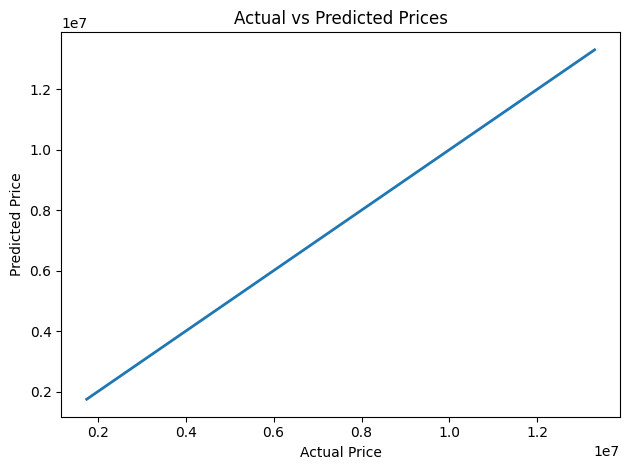

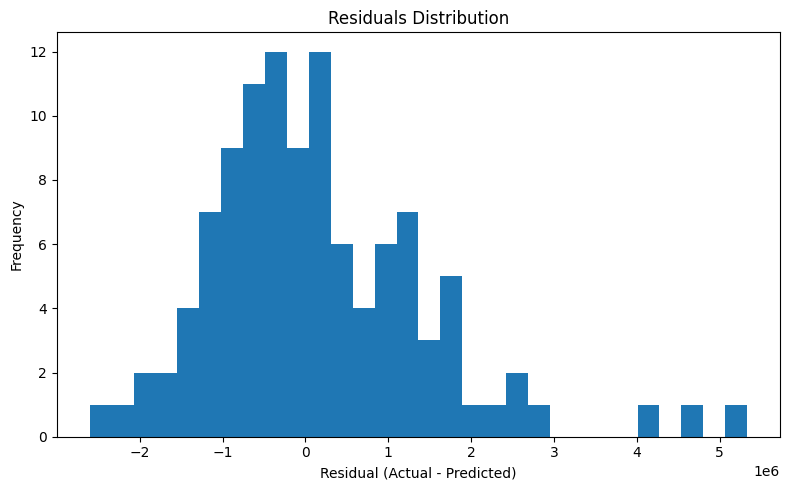

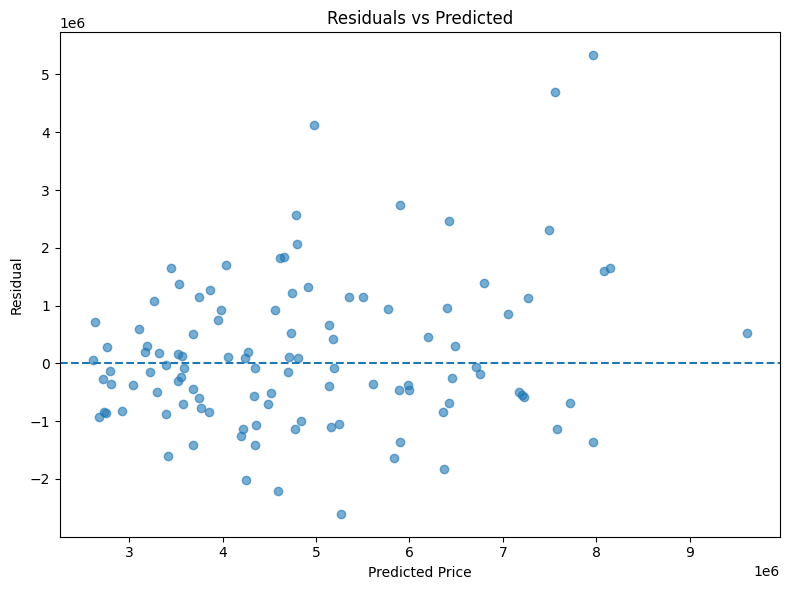

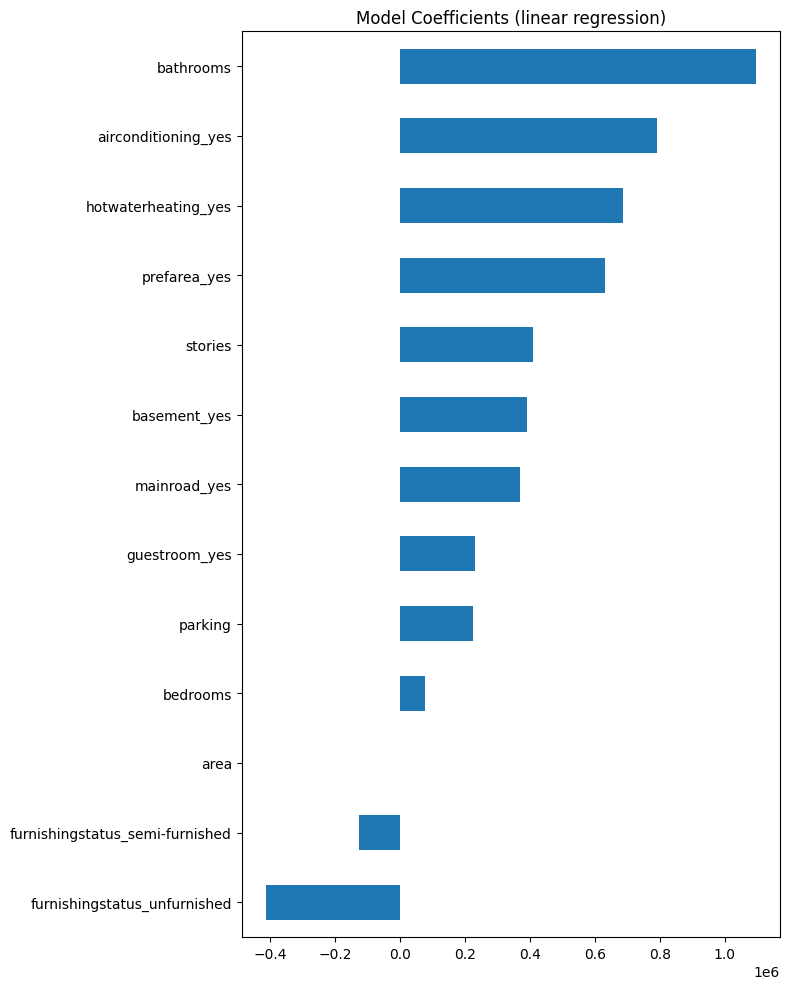

In [27]:
# Actual vs Predicted scatter plot
min_val = min(y_test.min(), y_pred.min())
max_val = max(y_test.max(), y_pred.max())
plt.plot([min_val, max_val], [min_val, max_val], linewidth=2)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted Prices')
plt.tight_layout()
plt.show()


# Residuals distribution
# %%
residuals = y_test - y_pred
plt.figure(figsize=(8,5))
plt.hist(residuals, bins=30)
plt.xlabel('Residual (Actual - Predicted)')
plt.ylabel('Frequency')
plt.title('Residuals Distribution')
plt.tight_layout()
plt.show()


# Residuals vs Predicted
# %%
plt.figure(figsize=(8,6))
plt.scatter(y_pred, residuals, alpha=0.6)
plt.axhline(0, linestyle='--')
plt.xlabel('Predicted Price')
plt.ylabel('Residual')
plt.title('Residuals vs Predicted')
plt.tight_layout()
plt.show()


# Coefficients (feature importance for linear model)
# %%
coeffs = pd.Series(model.coef_, index=X.columns).sort_values()
plt.figure(figsize=(8,10))
coeffs.plot(kind='barh')
plt.title('Model Coefficients (linear regression)')
plt.tight_layout()
plt.show()

In [28]:
# %%
joblib.dump(model, 'house_price_model.pkl')
joblib.dump(X.columns.tolist(), 'model_columns.pkl')
print("Saved 'house_price_model.pkl' and 'model_columns.pkl' in the current working directory.")

Saved 'house_price_model.pkl' and 'model_columns.pkl' in the current working directory.


In [29]:


# %%
# Create a sample input using the original column names (categorical values use the original string values as in the CSV)
sample_house = {
'area': 4000,
'bedrooms': 3,
'bathrooms': 2,
'stories': 2,
'mainroad': 'yes',
'guestroom': 'no',
'basement': 'no',
'hotwaterheating': 'no',
'airconditioning': 'yes',
'parking': 1,
'prefarea': 'no',
'furnishingstatus': 'semi-furnished'
}
# Convert to DataFrame and encode to match training columns
df_input = pd.DataFrame([sample_house])
df_input_encoded = pd.get_dummies(df_input)
# Align with training columns
df_input_encoded = df_input_encoded.reindex(columns=X.columns, fill_value=0)


predicted_price = model.predict(df_input_encoded)[0]
print(f"Predicted price for sample house: {predicted_price:,.2f} rupees")

Predicted price for sample house: 5,695,393.22 rupees
